<a href="https://colab.research.google.com/github/sangjae84/230607/blob/master/S_K_Netflix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [62]:
# 데이터 불러오기
data = pd.read_csv('https://raw.githubusercontent.com/minjung00/Netflix/main/netflix1.csv')

In [63]:
# 'country' 열이 'South Korea'인 데이터 추출
sk_data = data[data['country'] == 'South Korea']
sk_data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
536,s399,Movie,Kingdom: Ashin of the North,Kim Seong-hun,South Korea,7/23/2021,2021,TV-MA,94 min,"Horror Movies, International Movies, Thrillers"
646,s485,Movie,Lee Su-geun: The Sense Coach,Kim Joo-hyung,South Korea,7/9/2021,2021,TV-G,46 min,Stand-Up Comedy
707,s556,Movie,Snowpiercer,Bong Joon Ho,South Korea,7/2/2021,2013,R,126 min,"Action & Adventure, Cult Movies, International..."
708,s557,Movie,The 8th Night,Kim Tae-hyung,South Korea,7/2/2021,2021,TV-14,116 min,"Horror Movies, International Movies, Thrillers"
806,s763,Movie,Sweet & Sour,Lee Kae-byeok,South Korea,6/4/2021,2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies"
...,...,...,...,...,...,...,...,...,...,...
8705,s8258,TV Show,The Cravings,Not Given,South Korea,4/20/2017,2016,TV-14,2 Seasons,"International TV Shows, Korean TV Shows, TV Co..."
8716,s8331,Movie,The Great Battle,Not Given,South Korea,4/8/2019,2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies"
8726,s8380,TV Show,The Lady in Dignity,Not Given,South Korea,1/30/2018,2017,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr..."
8753,s8576,TV Show,This Is My Love,Not Given,South Korea,5/22/2017,2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."


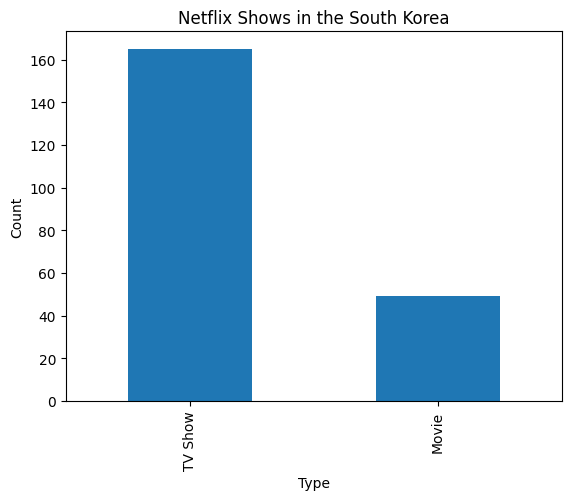

In [64]:
import matplotlib.pyplot as plt

# 'type' 열을 기준으로 막대 그래프 그리기
sk_data['type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Netflix Shows in the South Korea')
plt.show()


In [65]:
# release_year 열에서 1990부터 2000까지의 값을 묶음
data['release_year'] = data['release_year'].replace(range(1980, 2001), '1990-2000')

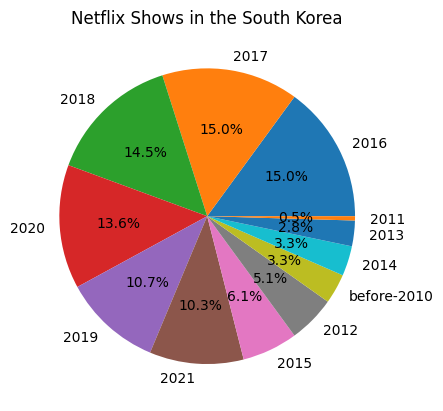

In [66]:
# 'type' 열을 기준으로 파이 차트 그리기
type_counts = sk_data['release_year'].replace(range(1900, 2011), 'before-2010').value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Netflix Shows in the South Korea')
plt.show()

In [67]:
# 맨 앞에 있는 값만 추출하여 새로운 열에 저장
data['main_genre'] = data['listed_in'].str.split(',').str[0]
data['main_genre']

0                  Documentaries
1                 Crime TV Shows
2                      TV Dramas
3       Children & Family Movies
4                         Dramas
                  ...           
8785      International TV Shows
8786                    Kids' TV
8787      International TV Shows
8788                    Kids' TV
8789                    Kids' TV
Name: main_genre, Length: 8790, dtype: object

In [68]:
genre_counts = sk_data['listed_in'].str.split(',').explode().str.strip().value_counts()

# DataFrame 생성
genre_table = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts})

top_10_genres = genre_table.head(10)

# 출력
print(top_10_genres)

                                         Genre  Count
International TV Shows  International TV Shows    152
Korean TV Shows                Korean TV Shows    131
Romantic TV Shows            Romantic TV Shows     76
International Movies      International Movies     42
TV Dramas                            TV Dramas     37
Dramas                                  Dramas     24
Crime TV Shows                  Crime TV Shows     24
TV Comedies                        TV Comedies     18
Action & Adventure          Action & Adventure     16
Thrillers                            Thrillers     14


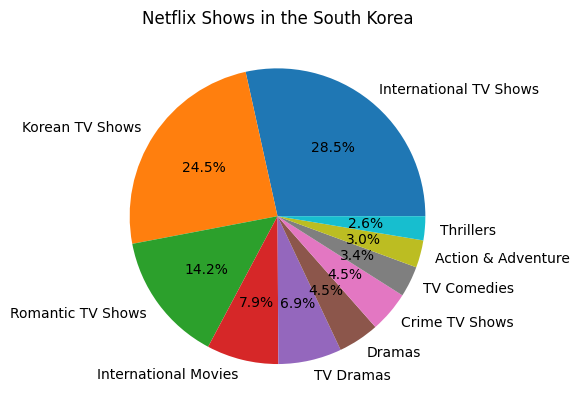

In [69]:
#파이 차트
plt.pie(top_10_genres.Count, labels=top_10_genres.index, autopct='%1.1f%%')

#차트 제목
plt.title('Netflix Shows in the South Korea')

#출력
plt.show()

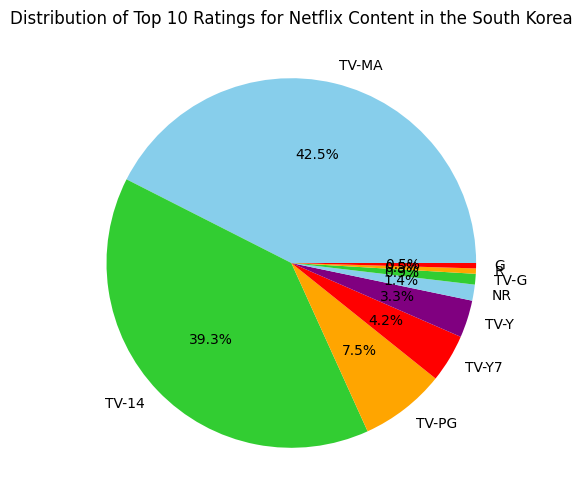

In [70]:
# 관람등급 통계 계산
rating_counts = sk_data['rating'].value_counts().head(10)

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=['skyblue', 'limegreen', 'orange', 'red', 'purple'])

# 그래프 제목 설정
plt.title('Distribution of Top 10 Ratings for Netflix Content in the South Korea')

# 그래프 출력
plt.show()

<ipython-input-71-f3b963d34b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(duration, bins=30, hist=True, kde=True, color='red')


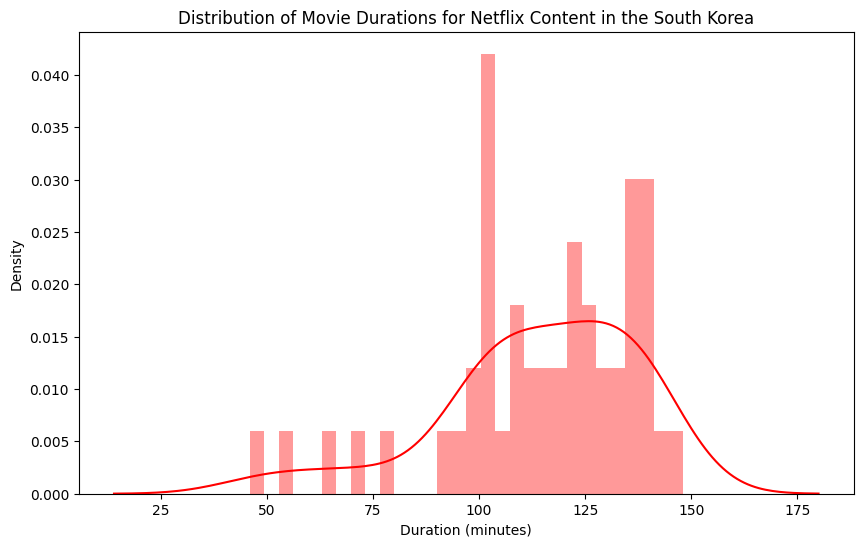

In [71]:
## 한국에서 제작된 영화 데이터 필터링
sk_movies_data = data[(data['country'] == 'South Korea') & (data['type'] == 'Movie')]

# 영상 길이 분포 계산
duration = sk_movies_data['duration'].str.replace(' min', '').astype(int)

# 그래프 설정
plt.figure(figsize=(10, 6))
sns.distplot(duration, bins=30, hist=True, kde=True, color='red')

# 그래프 제목과 축 레이블 설정
plt.title('Distribution of Movie Durations for Netflix Content in the South Korea')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')

# 그래프 출력
plt.show()

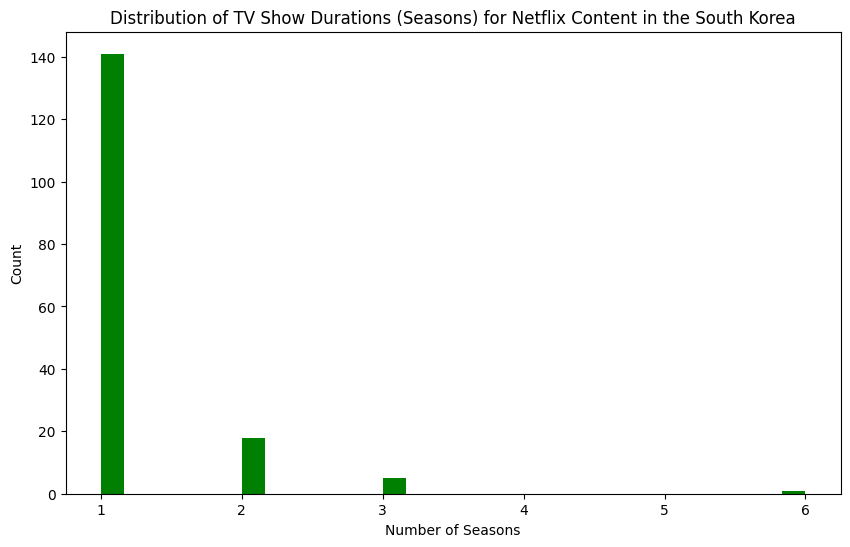

In [72]:
# 한국에서 제작된 TV 쇼 데이터 필터링
sk_tv_shows_data = data[(data['country'] == 'South Korea') & (data['type'] == 'TV Show')]

# 영상 길이 분포 계산
seasons = sk_tv_shows_data['duration'].str.extract('(\d+)').astype(int)

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.hist(seasons, bins=30, color='green')

# 그래프 제목과 축 레이블 설정
plt.title('Distribution of TV Show Durations (Seasons) for Netflix Content in the South Korea')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')

# 그래프 출력
plt.show()